# Analysis

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format='retina' 

import os
import sys
import numpy as np
from IPython.display import display
from glob import glob
import matplotlib.pyplot as plt
from itertools import cycle
import matplotlib as mpl
import pandas as pd


NDCG_DIR = '/Users/khalil/projects/cikm2017/data/ndcg/'

HOME = os.environ['HOME']
PROJECT_DIR = os.path.join(HOME, 'projects/cikm2017/')
FIGURES_DIR = os.path.join(HOME, 'projects/cikm2017/figures')
HDF_DIR = os.path.join(PROJECT_DIR, 'data/hdf5')

sys.path.append(PROJECT_DIR)
os.chdir(PROJECT_DIR) 

os.makedirs(FIGURES_DIR, exist_ok=True)

COLUMN_WIDTH_PTS = 241.14749

## Pros and Cons

In [2]:
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.style.use('/Users/khalil/Downloads/paperstyle_tex.mplstyle')

In [3]:

df_ta = pd.read_hdf(os.path.join(HDF_DIR, 'ta-bw-nw-a00-sessions.h5'))
df_ba = pd.read_hdf(os.path.join(HDF_DIR, 'ba-bw-nw-a00-sessions.h5'))
df_yp = pd.read_hdf(os.path.join(HDF_DIR, 'yp-bw-nw-a00-sessions.h5'))

In [4]:
from cikm.plots import plot_pros_and_cons, latexify, inches_to_points, points_to_inches

# latexify(usetex=True, scale=1, column_width_pt=COLUMN_WIDTH_PTS)
# latexify(usetex=True, scale=1.5, column_width_pt=COLUMN_WIDTH_PTS)

/Users/khalil/anaconda2/envs/cikm2017/lib/python3.6/site-packages/lightfm/_lightfm_fast.py:9: UserWarning: LightFM was compiled without OpenMP support. Only a single thread will be used.
  warnings.warn('LightFM was compiled without OpenMP support. '


In [5]:
dict_df_exp = {'ta': df_ta, 'ba': df_ba, 'yp': df_yp}

In [6]:
def _load_ndcgs():
    for path in glob(NDCG_DIR + '*.csv'):
        if '-ta-' in path:
            title = 'TA'
        elif '-ba-' in path:
            title = 'BA'
        elif '-yp-' in path:
            title = 'YP'

        df = pd.read_csv(path)
        df['dataset'] = title.lower()
        yield df
        
df_ndcgs_all = pd.concat(_load_ndcgs())

df_ndcgs_all.head(2)

,col,k,ndcg,dataset
0,rank_biasedmf,1,0.730752,ba
1,rank_biasedmf,2,0.758562,ba


In [8]:
# def rank_explanations(df_session):
#     """Rank explanations in each session.
    
#     Args:
#         df_session: DataFrame of explanations belonging to a single session.
#         rank_col: Name of column to rank explanations by.
#         rank_col_suffix: Suffix to add to resulting column from rank operation.
        
#     Returns:
#         DataFrame of explanation IDs and their rank.
#     """
#     df_session['rank_target_item_average_rating'] = df_session['target_item_average_rating'].rank(method='first', ascending=False)
#     return df_session[['explanation_id', 'rank_target_item_average_rating']]


# df_exp_ranks = dict_df_exp['ta'].groupby('session_id').apply(rank_explanations)
# dict_df_exp['ta'] = dict_df_exp['ta'].merge(df_exp_ranks, on='explanation_id')

# df_exp_ranks = dict_df_exp['ba'].groupby('session_id').apply(rank_explanations)
# dict_df_exp['ba'] = dict_df_exp['ba'].merge(df_exp_ranks, on='explanation_id')

# df_exp_ranks = dict_df_exp['yp'].groupby('session_id').apply(rank_explanations)
# dict_df_exp['yp'] = dict_df_exp['yp'].merge(df_exp_ranks, on='explanation_id')

In [9]:
# dict_df_exp['ba'].head()

In [12]:
%matplotlib inline

Removing minor ylabels
Removing minor ylabels
Removing minor ylabels
Removing minor ylabels
Removing minor ylabels
Removing minor ylabels
Removing minor ylabels
Removing minor ylabels


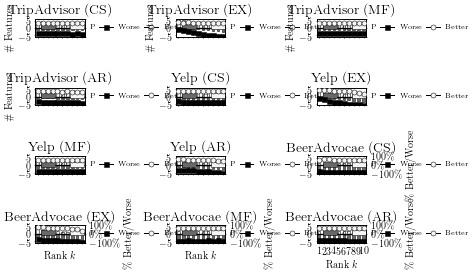

In [40]:
rank_col_alias = {'rank_related_items_sims_np': 'CS', 
                  'rank_strength': 'EX', 
                  'rank_target_item_average_rating': 'AR', 
                  'rank_biasedmf': 'MF'}


fig, axes = plt.subplots(nrows=4, ncols=3, sharex=True, sharey=True)
axes = cycle(axes.flatten())

for d_ln, d_sn in zip(['TripAdvisor', 'Yelp', 'BeerAdvocae'], ['TA', 'YP', 'BA']):
    df = dict_df_exp[d_sn.lower()]
    rank_columns = ['rank_related_items_sims_np', 'rank_strength', 
                    'rank_biasedmf', 'rank_target_item_average_rating']
    for rc in rank_columns:
        major_ylabel = True if d_sn == 'TA' else False
        minor_ylabel = True if d_sn == 'BA' else False
        show_xticklabels = True if rc == 'rank_target_item_average_rating' else False
#         major_ylabel = True
#         minor_ylabel = True
#         show_xticklabels = True
        plot_pros_and_cons(df, rank_col=rc, 
                           ax = next(axes),
                           title='{} ({})'.format(d_ln, rank_col_alias[rc]), 
                           xlabel='Rank $k$', 
                           title_fontsize=14, 
                           fname_prefix='{}-{}-'.format(d_sn, rc),
                           major_ylabel=major_ylabel,
                           minor_ylabel=minor_ylabel,
                           show_xticklabels=show_xticklabels,
                           show_xlabel=show_xticklabels,
                           out_dir=FIGURES_DIR)

In [14]:
plt.show()

In [11]:
assert 1 == 2

AssertionError: 

In [ ]:
rank_col_alias

In [ ]:
wspace = 0.08
weights = [0]
def plot_dataset_ndcg(df_ndcgs_all, dataset, markersize=5.5, title_fontsize='small', ylim=None, ylabel=None, xlabel=None, ax=None, out_dir=None, title=None):
    """Plots all NDCGs of a given dataset
    
    Args:
        df_ndcgs_all: DataFrame of all NDCGs
        dataset: Short name of the dataset to plot
        out_dir: where to save the figure.
    """
    
    # Define columns that'll be included in plot.
    plot_cols = ('rank_related_items_sims_np', 'rank_strength', 'rank_biasedmf')
    markers = cycle(['D', '^', 'o', 'v', '+', 'v'])
    linestyles = cycle([':', '--', '-', '-.'])
    markerfacecolors  = cycle(['r', 'b', 'g', 'y'])
    
    if not ax:
        fig, ax = plt.subplots()
    
    sims_plotted = False

    short_name = '{dataset}-bw'.format(
        dataset=dataset
    )
#         logger.info('Loaded {:,} explanations for {}'.format(len(df_explanations), short_name))        

    for rank_col in plot_cols:
        if sims_plotted and rank_col == 'rank_related_items_sims_np':
            continue

        marker = next(markers)
        linestyle = next(linestyles)
        markerfacecolor = next(markerfacecolors)

        label = 'default'
        if rank_col == 'rank_related_items_sims_np':
            label = 'CS' 
        label = label.replace('nw', 'Uniform').replace('uw', 'User').replace('hw', 'Item')
#         df = df_explanations.query('col == @rank_col').groupby('k').ndcg.mean() #bookmark
        dataset_lower = dataset.lower()
        df = df_ndcgs_all.query('col == @rank_col and dataset == @dataset_lower').copy() #bookmark
        assert len(df) > 0
    
        df.set_index('k').rename(columns={'ndcg': rank_col_alias[rank_col]}).plot(
            kind='line',
            marker=marker, 
            markersize=markersize, 
            ax=ax, 
            linewidth=1, 
            alpha=0.85,
            label=rank_col, 
            color='black', 
            linestyle=linestyle,
            markerfacecolor=markerfacecolor, 
            markeredgewidth=0.5,
            legend=False
        )
        if rank_col == 'rank_related_items_sims_np':
            sims_plotted = True

    
    ax.set_xticks([x + 1 for x in range(len(df))])
    ax.locator_params(axis='y', nticks=10)
    if title:
        ax.set_title(title, fontsize=title_fontsize)
        
    if xlabel:
        ax.set_xlabel(xlabel, fontsize='small')
        
    if ylabel:
        ax.set_ylabel(ylabel, labelpad=0, fontsize='small')
    else:
        ax.set_ylabel(None)
            
    if ylim:
        ax.set_ylim(ylim)
    plt.legend(scatterpoints=2, ncol=4, fontsize='x-small', loc='best',borderpad=0.5
#                frameon=False
              )
#     plt.tight_layout()
#     plt.subplots_adjust(top=0.95, wspace=wspace, hspace=0)

#     if out_dir:
#         logger.info('Saving figure to {}'.format(out_dir))
#         filename = os.path.join(FIGURES_DIR, '{}-{}'.format(dataset, 'ndcg'))
#         plt.savefig('{}.pdf'.format(filename), bbox_inches='tight')
        
    return
    

DATASET_LOOKUP = {
    'ba': 'BeerAdvocate',
    'ta': 'TripAdvisor',
    'yp': 'Yelp'
}

# from nbpreambles import inches_to_points, points_to_inches

print(points_to_inches(505), inches_to_points(243))
latexify(usetex=True, scale=1)

_, axes = plt.subplots(ncols=3, sharey=True, figsize=(points_to_inches(505.89), 2.5))
axes = axes.flatten()

for dataset, ax in zip(DATASET_LOOKUP.keys(), axes):
    plot_dataset_ndcg(df_ndcgs_all=df_ndcgs_all, dataset=dataset, ylim=(0.65,1),
#                       title_fontsize=14,
                      ax=ax,
                      out_dir=FIGURES_DIR, xlabel='Rank $k$', ylabel='$nDCG_k$', title=DATASET_LOOKUP[dataset])
# plt.set_ylabel('$nDCG_k$')
plt.tight_layout()
plt.locator_params(axis='y', nbins=8)
plt.subplots_adjust(top=0.95, wspace=wspace, hspace=0)

# Save
pad_inches = 0.035
plt.savefig(os.path.join(FIGURES_DIR, 'ndcgs.pdf'), bbox_inches='tight', pad_inches=pad_inches)
plt.savefig(os.path.join(FIGURES_DIR, 'ndcgs.png'), bbox_inches='tight', dpi=300, pad_inches=pad_inches)
#     break

In [ ]:
df_ndcgs_all.query('col == rank_related_items_sims_np')

In [ ]:
cols = ['rank_biasedmf', 'rank_svdpp', 'rank_strength', 'rank_related_items_sims_np']
from glob import glob
import cikm

print(points_to_inches(505), inches_to_points(243))
latexify(usetex=True, scale=1)


_, axes = plt.subplots(ncols=3, sharey=True, figsize=(points_to_inches(505.89), 2.5))
axes = axes.flatten()


for dataset, ax in zip(['ta', 'ba', 'yp'], axes):
    plot_dataset_ndcg(df_ndcgs_all=df_ndcgs_all, dataset=dataset, ylim=(0.69,1),
#                       title_fontsize=14,
                      ax=ax,
                      out_dir=FIGURES_DIR, xlabel='Rank $k$', ylabel='$nDCG_k$', title=DATASET_LOOKUP[dataset])
# plt.set_ylabel('$nDCG_k$')
plt.tight_layout()
plt.locator_params(axis='y', nbins=8)
plt.subplots_adjust(top=0.95, wspace=wspace, hspace=0)

# Save
pad_inches = 0.035
plt.savefig(os.path.join(FIGURES_DIR, 'ndcgs.pdf'), bbox_inches='tight', pad_inches=pad_inches)
plt.savefig(os.path.join(FIGURES_DIR, 'ndcgs.png'), bbox_inches='tight', dpi=300, pad_inches=pad_inches)
#     break


In [ ]:
df_ndcgs_all = pd.concat(_load_ndcgs())

In [ ]:
_, axes = plt.subplots(ncols=3, sharey=True, figsize=(points_to_inches(505.89), 2.5))
axes = axes.flatten()

markers = cycle(['D', '^', 'o', 'v', '+', 'v'])
linestyles = cycle([':', '--', '-', '-.'])
markerfacecolors  = cycle(['r', 'b', 'g', 'y'])
markersize=5.5

for dataset, ax in zip(df_ndcgs_all.dataset.unique(), axes):
    marker = next(markers)
    linestyle = next(linestyles)
    markerfacecolor = next(markerfacecolors)
    colors = cycle(['r', 'b', 'g', 'y', 'c', 'm', 'k'])
    cols = ['rank_biasedmf', 'rank_related_items_sims_np', 'rank_strength']
    df_ndcgs_summary = pd.read_csv(path)
    df_ndcgs_summary = df_ndcgs_summary[df_ndcgs_summary.col.isin(cols)]
    
    df_ndcgs_summary['col'] = df_ndcgs_summary.col.apply(lambda x: x.replace('_', '-'))
    plot_kwds = dict(marker=marker,  color='black', 
                     linestyle=linestyle, legend=False,
                     markerfacecolor=markerfacecolor, markersize=markersize, linewidth=1, alpha=0.85, markeredgewidth=0.5)
    cikm.plot_ndcg(df_ndcgs_summary,  plot_kwds=plot_kwds,
                   title=DATASET_LOOKUP[dataset.lower()], ax=ax,  ylim=(0.65,1))
    
plt.legend(scatterpoints=2, ncol=4, fontsize='x-small', loc='best',borderpad=0.5
#                frameon=False
              )

plt.tight_layout()
plt.locator_params(axis='y', nbins=8)
plt.subplots_adjust(top=0.95, wspace=wspace, hspace=0)

pad_inches = 0.035
plt.savefig(os.path.join(FIGURES_DIR, 'ndcgs.pdf'), bbox_inches='tight', pad_inches=pad_inches)
plt.savefig(os.path.join(FIGURES_DIR, 'ndcgs.png'), bbox_inches='tight', dpi=300, pad_inches=pad_inches)
#     break

In [ ]:
assert 1 == 2

In [ ]:
# _, axes = plt.subplots(ncols=3, sharey=True, figsize=(points_to_inches(505.89), 2.5))
# axes = axes.flatten()

# df_ndcgs_all = _load_ndcgs()

# for dataset, ax in zip(df_ndcgs_all.dataset.unique(), axes):
#     for path in glob(NDCG_DIR + '*.csv'):
#         print(path)
#         if '-ta-' in path:
#             title = 'TA'
#         elif '-ba-' in path:
#             title = 'BA'
#         elif '-yp-' in path:
#             title = 'YP'

#         cols = ['rank_biasedmf', 'rank_related_items_sims_np', 'rank_strength']
#         df_ndcgs_summary = pd.read_csv(path)
#         df_ndcgs_summary = df_ndcgs_summary[df_ndcgs_summary.col.isin(cols)]

#         df_ndcgs_summary['col'] = df_ndcgs_summary.col.apply(lambda x: x.replace('_', '-'))
#         cikm.plot_ndcg(df_ndcgs_summary, title='NDCGs ' + title, ax=ax,  ylim=(0.69,1))
        
# plt.tight_layout()
# plt.locator_params(axis='y', nbins=8)
# plt.subplots_adjust(top=0.95, wspace=wspace, hspace=0)

# pad_inches = 0.035
# plt.savefig(os.path.join(FIGURES_DIR, 'ndcgs.pdf'), bbox_inches='tight', pad_inches=pad_inches)
# plt.savefig(os.path.join(FIGURES_DIR, 'ndcgs.png'), bbox_inches='tight', dpi=300, pad_inches=pad_inches)
# #     break

## How do TripAdvisor recommendations differ from those of BeerAdvocate and Yelp.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


exp_path_fmt = '/Users/khalil/projects/explanations/hdf5/{}-bw-nw-a00-sessions.h5'
cols = ['target_item_id', 'target_item_average_rating', 'seed_item_id']
df_exp_ta = pd.read_hdf(exp_path_fmt.format('ta'))

In [ ]:
df_exp_ta.groupby('session_id').size().hist()

In [ ]:
from cikm import filter_incomplete_sessions

In [ ]:
def load_explanation(dataset):
    assert dataset in ('ta', 'ba', 'yp')
    df_exp_ta = pd.read_hdf(exp_path_fmt.format(dataset))
    df_exp_ta = filter_incomplete_sessions(df_exp_ta)
    assert df_exp_ta.groupby('session_id').size().unique()[0] == 10
    df_exp_ta = df_exp_ta[cols].drop_duplicates()
    df_exp_ta = df_exp_ta.query('seed_item_id != target_item_id').copy()
    df_exp_ta['dataset'] = dataset
    return df_exp_ta

In [ ]:
df_exps = pd.concat([load_explanation('ta'), load_explanation('ba'), load_explanation('yp')])

In [ ]:
df = pd.DataFrame()

for dataset in ('ta', 'ba', 'yp'):
    s = df_exps.query('dataset == @dataset').groupby('seed_item_id').target_item_average_rating.mean()
    df[dataset] = s.reset_index().target_item_average_rating
    
df.plot(kind='box', showmeans=True, figsize=(13,4), grid=True, 
        title='Average ratings of items in a recommendation sessions')

# Display the average and std.dev of the 'average rating per session' distribution.
display('Average and std.dev of the `average rating per session` distribution.')
display(pd.DataFrame({'average': df.mean(), 'std_dev': df.std()}))

Sessions in TripAdvisor have higher ratings (approx 0.5) more than that of BeerAdvocate & Yelp. The average rating per session for TripAdvisor is 4.0±0.4, that of Yelp is 3.6±0.3, and BeerAdvocate is 3.6±0.4.

In [ ]:
df = pd.DataFrame()

for dataset in ('ta', 'ba', 'yp'):
    s = df_exps.query('dataset == @dataset').groupby('seed_item_id').target_item_average_rating.std()
    df[dataset] = s.reset_index().target_item_average_rating
    
df.plot(kind='box', showmeans=True, figsize=(13,4), grid=True, 
        title='Std deviation of items in a recommendation sessions')

# Display the average and std.dev of the 'average rating per session' distribution.
display('Average and std.dev of the `Std deviation rating per session` distribution.')
display(pd.DataFrame({'average': df.mean(), 'std_dev': df.std()}))

In [ ]:
assert 1 == 2

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(16,6))
axes = axes.flatten()

grp = df_exp_ta.groupby('seed_item_id')

grp.target_item_average_rating.mean().plot(kind='hist', title=dataset,ax=axes[0], xlim=(1.5, 5))
axes[0].axvline(x=grp.target_item_average_rating.mean().mean())

grp.target_item_average_rating.std().plot(kind='hist', title=dataset, ax=axes[1], xlim=(0, 1.4))
axes[1].axvline(x=grp.target_item_average_rating.std().mean())

In [ ]:
assert 1 == 2

In [ ]:
path_fmt = os.path.join(LIBREC_RESULT_DIR, '{}/rating/ratings.txt-biasedmf-output/biasedmf')
result_paths = {
    'ta': path_fmt.format('tripadvisor'),
    'ba': path_fmt.format('beeradvocate'),
    'yp': path_fmt.format('yelp')
}

# Define paths to extraction files.
ext_paths = {'ta': '/Users/khalil/data/tripadvisor/extractions-ta.csv',
             'ba': '/Users/khalil/data/beeradvocate/extractions.csv',
             'yp': '/Users/khalil/data/yelp/extractions.csv'}

import cikm
import pandas as pd

In [ ]:


datasets_map = {
    'ta': 'tripadvisor', 'yp': 'yelp', 'ba': 'beeradvocate'
}

# dataset = 'ta'

for dataset in ('ta', 'ba', 'yp'):
    # Load extractions.
    result = extract_ratings(ext_csv_path=ext_paths[dataset], persist=False)
    df_ratings, user_ids_map, item_ids_map = result
    print('len(df_ratings) ', len(df_ratings))

    # Load predictions.
    print(result_paths[dataset])
    df_predictions = pd.read_csv(result_paths[dataset], names=['user_id', 'item_id', 'rating'])

    cols = ['user_id', 'item_id', 'rating']
    df_all_ratings = pd.concat([df_ratings[cols], df_predictions])
    del df_ratings, df_predictions

    def invert_dict(d):
        return {v:k for k,v in d.items()}

    df_all_ratings['user_id_orig'] = df_all_ratings.user_id.map(invert_dict(user_ids_map))
    df_all_ratings['item_id_orig'] = df_all_ratings.item_id.map(invert_dict(item_ids_map))
    df_all_ratings['user_id_target_item_id'] = df_all_ratings.user_id_orig.astype(str) + '#' + df_all_ratings.item_id_orig.astype(str)
    df_all_ratings.head(2)

    # Load explanations.
    path = os.path.join(hdf5_dir, '{}-bw-nw-a00-sessions.h5'.format(dataset))
    df_explanations = pd.read_hdf(path)
    print('Loaded {:,} explanations'.format(len(df_explanations)))
    n_explanations = len(df_explanations)

    df_explanations['user_id_target_item_id'] = df_explanations.user_id.astype(str) + '#' + df_explanations.target_item_id.astype(str)

    # df = df_all_ratings[['user_id_target_item_id', 'rating']].rename(columns={'rating': 'mf_rating'})
    rating_map = df_all_ratings[['user_id_target_item_id', 'rating']].set_index('user_id_target_item_id').rating.to_dict()
    df_explanations['mf_rating'] = df_explanations.user_id_target_item_id.map(rating_map)

    assert len(df_explanations) == n_explanations

    # Rank explanations in each session.
    def rank_explanations(df):
        df['rank_mf'] = df.mf_rating.rank(method='first', ascending=False) - 1
        return df[['explanation_id', 'rank_mf']]

    df_exp_ranks = df_explanations.groupby('session_id').apply(rank_explanations)
    df_explanations = df_explanations.merge(df_exp_ranks, on='explanation_id')
    assert len(df_explanations) == n_explanations


    df_ndcgs = cikm.compute_ndcg(df_explanations)
    df_ndcgs_summary = cikm.summarize_ndcg(df_ndcgs)

    cikm.plot_ndcg(df_ndcgs_summary, title='NDCGs of {}'.format(dataset.upper()))


# for dataset in ('ta', 'ba', 'yp'):
#     # Load extractions.
#     result = extract_ratings(ext_csv_path=ext_paths[dataset], persist=False)
#     df_ratings, user_ids_map, item_ids_map = result
#     display(df_ratings.head(2))
#     print('len(df_ratings) ', len(df_ratings))
    
#     # Load predictions.
#     print(result_paths[dataset])
#     df_predictions = pd.read_csv(result_paths[dataset], names=['user_id', 'item_id', 'rating'])
#     display(df_predictions.head(2))
#     print('len(df_predictions) ', len(df_predictions))
    
#     df_all_ratings = pd.concat([df_ratings, df_predictions])
#     print('len(df_all_ratings) ', len(df_all_ratings))
#     break
    
#     # Load explanations.
#     path = os.path.join(hdf5_dir, '{}-bw-nw-a00-sessions.h5'.format(dataset))
#     df_explanations = pd.read_hdf(path)
#     print('Loaded {:,} explanations'.format(len(df_explanations)))


#     # TODO: use new rating to rank explanations
    
    
#     assert 1 == 2
#     df_ndcgs = cikm.compute_ndcg(df_explanations)
#     df_ndcgs_summary = cikm.summarize_ndcg(df_ndcgs)

#     cikm.plot_ndcg(df_ndcgs_summary, title='NDCGs of {}'.format(dataset.upper()))

In [ ]:
assert 1 == 2